# **Team Project 3 - Predicting Forest Cover Type**

For this project, our team will predict the predominant forest cover type from strictly cartographic variables, such as elevation, slope, and soil type. The actual forest cover type for a given 30 x 30 meter cell was determined with US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

- See more at: https://archive.ics.uci.edu/ml/datasets/Covertype

- Data downloaded at: https://www.kaggle.com/c/forest-cover-type-prediction/data




https://notebook.community/krosaen/ml-study/kaggle/forest-cover-type-prediction2/forest-cover-type-prediction2

https://notebook.community/krosaen/ml-study/kaggle/forest-cover-type-prediction/forest-cover-type-prediction

https://shankarmsy.github.io/posts/forest-cover-types.html



In [3]:
# Download the necessary packages for this analysis: 

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report



In [71]:
# Read in train cover type dataset & print descriptive statistics

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
print("Train dataset rows: {}".format(train_df.shape[0]))
print("Train dataset features: {}".format(train_df.shape[1]))
print("Rows with missing data: {}".format(train_df.isnull().sum().sum()))

print("")
print("Test dataset rows: {}".format(test_df.shape[0]))
print("Test dataset features: {}".format(test_df.shape[1]))
print("Rows with missing data: {}".format(test_df.isnull().sum().sum()))


Train dataset rows: 15120
Train dataset features: 56
Rows with missing data: 0

Test dataset rows: 565892
Test dataset features: 55
Rows with missing data: 0


In [50]:
# Analyze all varialbes: 
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.000000,2752.000000,3104.000000,3849.000000
Hillshade_All,15120.0,566.761905,51.375104,317.0,541.000000,577.000000,604.000000,641.000000
Dist_Hydro,15120.0,235.948778,215.491695,0.0,67.186308,188.480768,342.069071,1356.939571
Aspect,15120.0,156.676653,110.085801,0.0,65.000000,126.000000,261.000000,360.000000
Slope,15120.0,16.501587,8.453927,0.0,10.000000,15.000000,22.000000,52.000000
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.000000,180.000000,330.000000,1343.000000
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.000000,32.000000,79.000000,554.000000
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.000000,1316.000000,2270.000000,6890.000000
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.000000,220.000000,235.000000,254.000000
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.000000,223.000000,235.000000,254.000000


In [72]:
# Identify the labeled data for this analysis

print(train_df['Cover_Type'].unique())
print(train_df['Cover_Type'].value_counts())

[5 2 1 7 3 6 4]
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
Name: Cover_Type, dtype: int64


<span style="background-color: #FFFF00">Task 1: Verify dropped values should be droppped</span>
- <span style="background-color: #ADD8E6"> GJ: I agree - seems value all zero

In [73]:
# Remove three columns where there are no data values or no data data values of interest (ID): 
train_df.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis = 1, inplace = True)
print("New Shape: {}".format(train_df.shape))

# Do the same thing for the Test dataset so the data is comparable
test_df.drop(['Id', 'Soil_Type7', 'Soil_Type15'], axis = 1, inplace = True)
print("New Shape: {}".format(test_df.shape))


New Shape: (15120, 53)
New Shape: (565892, 52)


<span style="background-color: #FFFF00">Task 2: Ensure correlation matrix code is correct</span>

<span style="background-color: #ADD8E6"> GJ: seems right to me

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


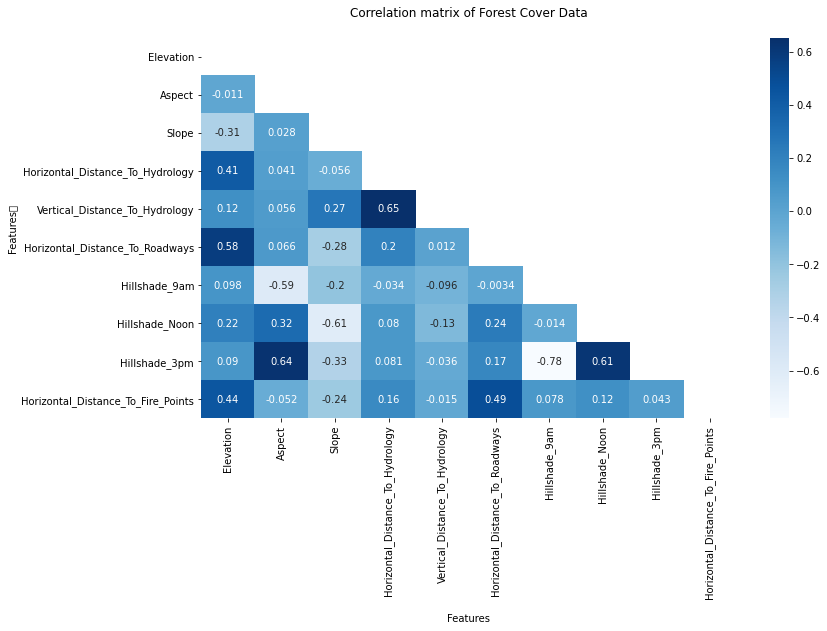

In [74]:
# Check correlations on continuous variables (columns 0:10)
corr_matrix = train_df.iloc[:, :10].corr()
plt.subplots(figsize = (12, 7))
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

heatmap = sns.heatmap(corr_matrix, annot = True, cmap = 'Blues', mask = mask)
heatmap.set(xlabel='\nFeatures', ylabel='Features\t', title = "Correlation matrix of Forest Cover Data\n")
heatmap.set_xticklabels(corr_matrix, rotation=90)

plt.show()

<span style="background-color: #ADD8E6"> GJ: I added a few more EDAs here

(array([  13.,   16.,   57.,  209.,  529., 1018., 2047., 3663., 4533.,
        3035.]),
 array([ 99. , 114.5, 130. , 145.5, 161. , 176.5, 192. , 207.5, 223. ,
        238.5, 254. ]),
 <BarContainer object of 10 artists>)

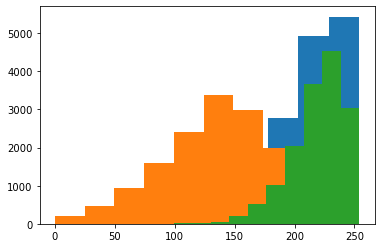

In [168]:
plt.hist(train_df["Hillshade_9am"])
plt.hist(train_df["Hillshade_3pm"])
plt.hist(train_df["Hillshade_Noon"])

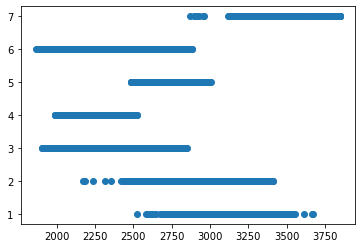

In [175]:
# seems Cover Type highly correlates with elevation 
X = train_df["Elevation"]
Y = train_df["Cover_Type"]
plt.scatter(X,Y)

# Notes about correlations

<span style="background-color: #FFFF00">Task 3: Review/edit correlation summary, including how the medium and strong designations have been set (I based these buckets on other sources but didn't find any "official" guidance</span>

Correlations that may present risks of Multicollinearity

Positive Correlation (medium = .50 < x < .70 | strong = > 0.70)
- Hillside shade at 12 pm & 9 am are correlated (medium)
- Hillside 3 pm shade and aspect ratio are correlated (medium) 
- Horizontal distance to roadways and elevation are correlated (medium)
- Vertical distance to hydrology and horizontal distance to hydrology are correlated (medium)

Negative Correlation (medium = -.50 < x < -.70 | strong = > -0.70)
- Aspect ratio and hillside shade 9 am (medium)
- Slope and hillside shape 12 pm (medium)
- Hillside 9 am and 3 pm (strong)

Scatterplots for POSITIVELY Correlated Features


<AxesSubplot:xlabel='Vertical_Distance_To_Hydrology', ylabel='Horizontal_Distance_To_Hydrology'>

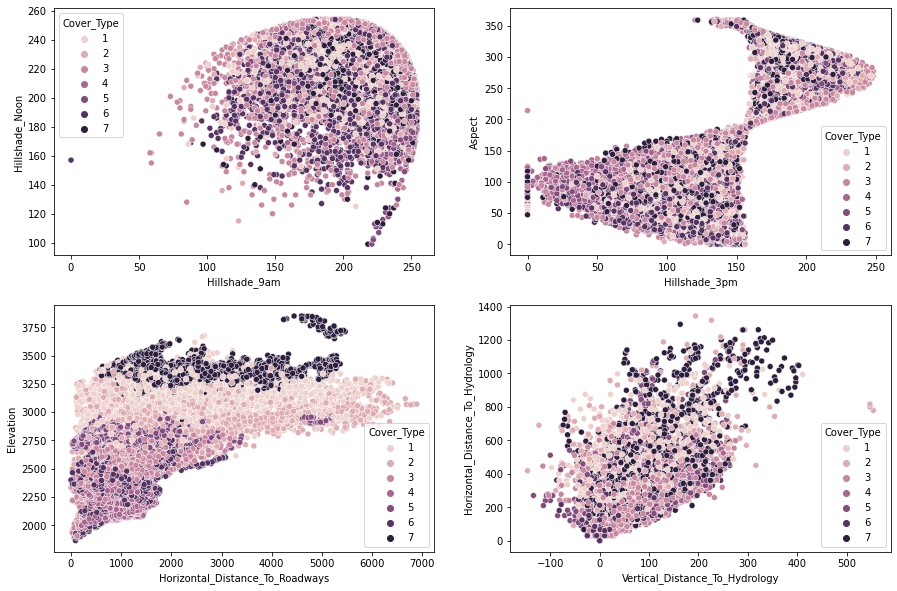

In [88]:
# Plot the correlations of variables with a medium - strong correlation
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace = .2)
print("Scatterplots for POSITIVELY Correlated Features")


# Plots
plt.subplot(2, 2, 1)
sns.scatterplot(x='Hillshade_9am', y='Hillshade_Noon', hue = 'Cover_Type', data=train_df)

plt.subplot(2, 2, 2)
sns.scatterplot(x='Hillshade_3pm', y='Aspect', hue = 'Cover_Type', data=train_df)

plt.subplot(2, 2, 3)
sns.scatterplot(x='Horizontal_Distance_To_Roadways', y='Elevation', hue = 'Cover_Type', data=train_df)

plt.subplot(2, 2, 4)
sns.scatterplot(x='Vertical_Distance_To_Hydrology', y='Horizontal_Distance_To_Hydrology', hue = 'Cover_Type', data=train_df)

Scatterplots for NEGATIVELY Correlated Features


<AxesSubplot:xlabel='Hillshade_9am', ylabel='Hillshade_3pm'>

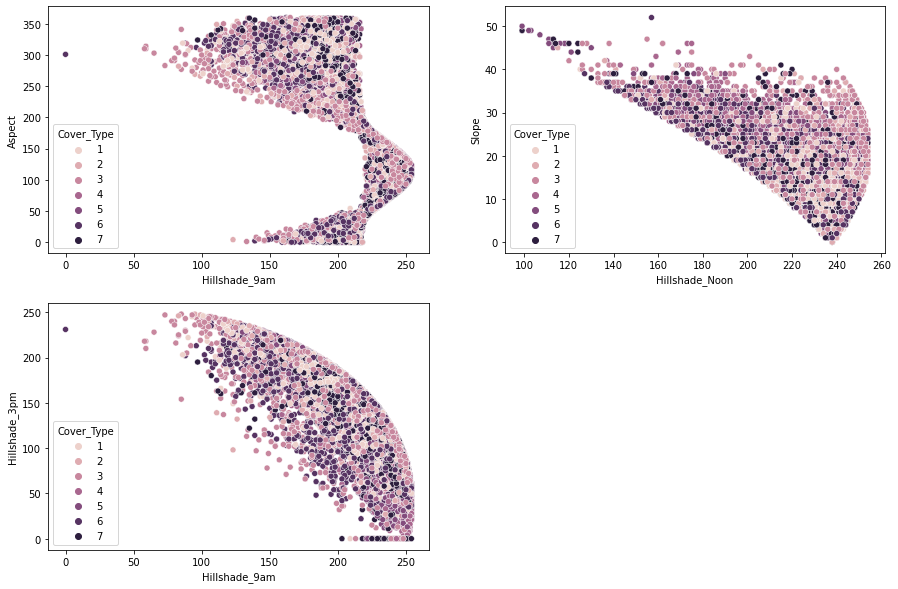

In [76]:
# Plot the correlations of variables with a medium - strong correlation
plt.subplots(figsize=(15, 10))
plt.subplots_adjust(hspace = .2)
print("Scatterplots for NEGATIVELY Correlated Features")

# Plots
plt.subplot(2, 2, 1)
sns.scatterplot(x='Hillshade_9am', y='Aspect', hue = 'Cover_Type', data=train_df)

plt.subplot(2, 2, 2)
sns.scatterplot(x='Hillshade_Noon', y='Slope', hue = 'Cover_Type', data=train_df)

plt.subplot(2, 2, 3)
sns.scatterplot(x='Hillshade_9am', y='Hillshade_3pm', hue = 'Cover_Type', data=train_df)


# Feature Engineering: 

<span style="background-color: #FFFF00">Task 4: Review existing transformations; determine if they make sense or if we should delete these existing transformations; and potentially add in any new trasformations</span>

Performing transformations to the two strongest correlations: 

- Vertical and horizontal distance to hydrology
- Correlations between all hillside shade values

<span style="background-color: #ADD8E6">  I agree - (1) i think Vertical / Horizontal correlation high enough to combine  (2) not sure about hillshade as I saw some of the hillshade correlation low in above chart 

In [77]:
# Transformation 1 - Vertical and Horizonal Distance to Hydrology (Euclidean Distance)

vertical_values = train_df['Vertical_Distance_To_Hydrology']
horizontal_values = train_df['Horizontal_Distance_To_Hydrology']
Dist_Hydro = np.sqrt(np.power(vertical_values, 2) + np.power(horizontal_values, 2))
train_df.insert(loc=1, column='Dist_Hydro', value=Dist_Hydro)

# Transformation 2 - Vertical and Horizonal Distance to Hydrology
Hillshade_All = (train_df['Hillshade_9am'] + train_df['Hillshade_Noon'] + train_df['Hillshade_3pm'])
train_df.insert(loc=1, column='Hillshade_All', value=Hillshade_All)

train_df['Hillshade_All'].describe().T

count    15120.000000
mean       566.761905
std         51.375104
min        317.000000
25%        541.000000
50%        577.000000
75%        604.000000
max        641.000000
Name: Hillshade_All, dtype: float64

In [78]:
# Apply the same transformation to the Test dataset (Euclidean Distance)

# Transformation 1 - Vertical and Horizonal Distance to Hydrology (vector length)
vertical_values_test = test_df['Vertical_Distance_To_Hydrology']
horizontal_values_test = test_df['Horizontal_Distance_To_Hydrology']
Dist_Hydro_2 = np.sqrt(np.power(vertical_values_test, 2) + np.power(horizontal_values_test, 2))
test_df.insert(loc=1, column='Dist_Hydro', value=Dist_Hydro_2)

# Transformation 2 - Vertical and Horizonal Distance to Hydrology
Hillshade_All_2 = (test_df['Hillshade_9am'] + test_df['Hillshade_Noon'] + test_df['Hillshade_3pm'])
test_df.insert(loc=1, column='Hillshade_All', value=Hillshade_All_2)


<span style="background-color: #ADD8E6">  not a big thing but I feel since we already havehillshde_all and dist_hydro, should we drop the other hillshade value as well as Hydro (vertical +horizontal value)?

In [79]:
# Make a copy of the training dataset
train_df.head(1).T

,0
Elevation,2596.0
Hillshade_All,601.0
Dist_Hydro,258.0
Aspect,51.0
Slope,3.0
Horizontal_Distance_To_Hydrology,258.0
Vertical_Distance_To_Hydrology,0.0
Horizontal_Distance_To_Roadways,510.0
Hillshade_9am,221.0
Hillshade_Noon,232.0


<span style="background-color: #FFFF00">Task 5: Check standardization code for both train and test</span>

<span style="background-color: #ADD8E6">  looks good to me

In [80]:
# Standardize the quantitative data for both the train and test data sets

# Make copy of the train_df 
train_df_std = train_df.copy()

# Isolate quantitative variables in the train dataset
quantitative_train = train_df.iloc[:,:12]

# Standardize the continuous variables 
standardizer = StandardScaler()
standardizer.fit(quantitative_train)
quantitative_train = standardizer.transform(quantitative_train)

# Reset standardized values for the quantitative data
train_df_std.iloc[:,0:12] = quantitative_train[:, 0:12]
train_df_std.shape

(15120, 55)

In [81]:
# Standardize the quantitative data for both the train and test data sets

# Make copy of the test_df 
test_df_std = test_df.copy()

# Isolate quantitative variables in the test dataset
quantitative_test = test_df.iloc[:,:12]

# Standardize the continuous variables 
standardizer_2 = StandardScaler()
standardizer_2.fit(quantitative_test)
quantitative_test = standardizer_2.transform(quantitative_test)

# Reset standardized values for the quantitative data
test_df_std.iloc[:,0:12] = quantitative_test[:, 0:12]
test_df_std.shape

(565892, 54)

<span style="background-color: #FFFF00">Task 7: Check that cover_type labels are dropped correctly and update the code notes so that it flows better</span>

<span style="background-color: #ADD8E6">  updated code below as "updated"

In [82]:
# Remove Cover_Type from the train dataset
train_labels = train_df.Cover_Type
train_labels

# Data set for non-standardized data
# train_X_nstd = train_df.drop(columns='Cover_Type', axis=1)  <- GJ: this is orignal think we should use std
train_X_nstd = train_df_std.drop(columns='Cover_Type', axis=1)  #updated
train_Y_nstd = train_labels

# Data set for standardized data
train_X = train_df_std.drop(columns='Cover_Type', axis=1)
train_Y = train_labels

In [83]:
train_X.shape

(15120, 54)

<span style="background-color: #FFFF00">Task 8: Determine whether we should limite the # of features using the Random Classifier method. This is a way to determine the most important features based on a random forests classifier. There is no action that I have taken with this information but we could use it to reduce the number of features in the model.  </span>

In [84]:
# Create an empty dataframe to hold our findings for feature_importances_
ranking_df = pd.DataFrame()

RFC_model = RandomForestClassifier(random_state=0, n_jobs=-1)
RFC_model.fit(train_X, train_Y)

importances = RFC_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Get feature name
rfc_list = [train_X.columns[indices[f]] for f in range(train_X.shape[1])]
ranking_df['RFC'] = rfc_list

# Get feature importance
rfci_list = [importances[indices[f]] for f in range(train_X.shape[1])]
ranking_df['RFC importance'] = rfci_list

ranking_df

,RFC,RFC importance
0,Elevation,0.217943
1,Horizontal_Distance_To_Roadways,0.087262
2,Horizontal_Distance_To_Fire_Points,0.068434
3,Dist_Hydro,0.050354
4,Horizontal_Distance_To_Hydrology,0.047059
5,Hillshade_9am,0.046655
6,Vertical_Distance_To_Hydrology,0.043269
7,Aspect,0.042332
8,Wilderness_Area4,0.040721
9,Hillshade_3pm,0.038923


<span style="background-color: #FFFF00">Task 9: If using any transformed values, we need to make sure to drop the features that have been transformed (e.g., all the hillshade values by time of day) </span>

<span style="background-color: #FFFF00">Task 10: Check that train/dev take place correctly </span>

In [86]:
# Set up the train and development data for the standardized data

# Establish the split between the train and development sets (assumption: 80/20)
threshold_value = int(len(train_df.Cover_Type) * .80)

# Standardize train and development data and labels
train_data, train_labels = train_X[:threshold_value], train_Y[:threshold_value]
dev_data, dev_labels = train_X[threshold_value:], train_Y[threshold_value:]

# Print Values
print('training label shape:', train_labels.shape)
print('dev label shape:',      dev_labels.shape)
print(train_data.shape, dev_data.shape, train_labels.shape, dev_labels.shape)

training label shape: (12096,)
dev label shape: (3024,)
(12096, 54) (3024, 54) (12096,) (3024,)


<span style="background-color: #FFFF00">Task 11: Check KNN code  </span>

Accuracy for each k-Nearest Neighbor Model (k = 1, 3, 5, 7, 9 and 11)

Accuracy Using k = 1 neighbors: 0.79861
Accuracy Using k = 3 neighbors: 0.79630
Accuracy Using k = 5 neighbors: 0.78671
Accuracy Using k = 7 neighbors: 0.77480
Accuracy Using k = 9 neighbors: 0.76918
Accuracy Using k = 11 neighbors: 0.76521

For the 1-Nearest Neighbor model: precision, recall, F1 and support for each label:

                   precision    recall  f1-score   support

       Spruce/Fir       0.79      0.58      0.67       364
   Lodgepole Pine       0.56      0.35      0.43       249
   Ponderosa Pine       0.71      0.58      0.64       511
Cottonwood/Willow       0.85      0.95      0.90       530
            Aspen       0.71      0.92      0.80       368
      Douglas-fir       0.69      0.79      0.74       505
        Krummholz       0.88      0.97      0.92       497

         accuracy                           0.77      3024
        macro avg       0.74      0.73      0.73      3024
     weigh

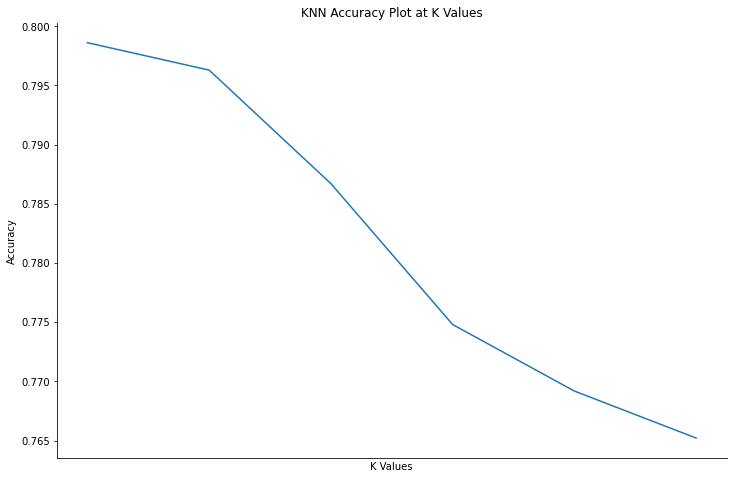

In [87]:
def knn_function(k_values):
    '''A function to calculate K nearest neighbor for the scaled dataset'''
    
    # Set up list for plotting
    print("Accuracy for each k-Nearest Neighbor Model (k = 1, 3, 5, 7, 9 and 11)\n")
    accuracy_scores = []
    
    # loop through the list in k_values    
    for k in k_values: 
        
        # Number of neighbors (n (low) = underfitting & n(high) = overfitting )
        KNN_model = KNeighborsClassifier(n_neighbors = k, weights = 'distance')
        
        # Fit the model to the train data & train labels
        KNN_model.fit(train_data, train_labels)
        
        # Use the model to predict the dev dataset
        test_predicted_labels = KNN_model.predict(dev_data)
        
        # Print the number of neighbors and score for each model
        print("Accuracy Using k = {} neighbors: {:.5f}".format(k, KNN_model.score(dev_data, dev_labels)))
        accuracy_scores.append(KNN_model.score(dev_data, dev_labels))
        
    for k in k_values:
        if k == 1: 
            print("\nFor the 1-Nearest Neighbor model: precision, recall, F1 and support for each label:\n")
            target_names = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow",
                            "Aspen", "Douglas-fir", "Krummholz"]
            print(classification_report(dev_labels, test_predicted_labels, target_names=target_names))

    # Plot the results
    fig = plt.figure(figsize=(12, 8))
    ax = plt.subplot(1, 1, 1)
    ax.axes.xaxis.set_ticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.plot(k_values, accuracy_scores)
    ax.set_title('KNN Accuracy Plot at K Values')
    ax.set_xlabel('K Values')
    ax.set_ylabel('Accuracy')
    

k_values = [1, 3, 5, 7, 9, 11]
knn_function(k_values)

<span style="background-color: #FFFF00">Task 12: Check logistic regression code and model settings (e.g., solver) is correct </span>

In [28]:
def logistic_function(C_param_range):
    
    # Create logistic regression model & print results
    for c in C_param_range: 
        lr_model = LogisticRegression(C = c, solver="liblinear", multi_class="auto")
        lr_model.fit(train_data, train_labels)   
        test_predicted_labels = lr_model.predict(dev_data)
        print("\nF1 Score using C = {} the result is:{:.4f}".format(c, metrics.f1_score
                                                                (dev_labels, 
                                                                 test_predicted_labels,  average = 'weighted')))
    

    
C_param_range = [0.001, 0.01, 0.1, 0.25, 0.5, 1, 10, 50, 100]
logistic_function(C_param_range)


F1 Score using C = 0.001 the result is:0.4889

F1 Score using C = 0.01 the result is:0.5914

F1 Score using C = 0.1 the result is:0.6217

F1 Score using C = 0.25 the result is:0.6183

F1 Score using C = 0.5 the result is:0.6158

F1 Score using C = 1 the result is:0.6162

F1 Score using C = 10 the result is:0.6156

F1 Score using C = 50 the result is:0.6213

F1 Score using C = 100 the result is:0.6269
